# Dataset

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000usd
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [36]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

#Machine learning
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data=pd.read_csv('housing data.csv', header=None, delimiter=",", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
df=data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [38]:
df.isna().sum().sort_values()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


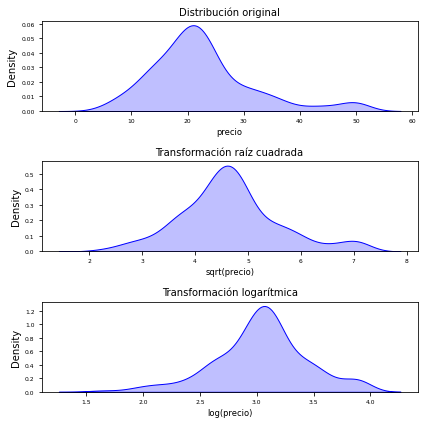

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df.MEDV,
    shade=True,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df.MEDV),
    shade=True,
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df.MEDV),
    shade=True,
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [50]:
print('Kursotis for LTS:', stats.kurtosis(df.MEDV))
print('Skewness for LTS:', stats.skew(df.MEDV))
print('Kursotis for HTS:', stats.kurtosis(np.sqrt(df.MEDV)))
print('Skewness for HTS:', stats.skew(np.sqrt(df.MEDV)))
print('Kursotis for HTS:', stats.kurtosis(np.log(df.MEDV)))
print('Skewness for HTS:', stats.skew(np.log(df.MEDV)))

Kursotis for LTS: 1.4686287722747462
Skewness for LTS: 1.104810822864635
Kursotis for HTS: 0.5728964557364504
Skewness for HTS: 0.43763305472800307
Kursotis for HTS: 0.7876000122225841
Skewness for HTS: -0.32934127453151935


<AxesSubplot:>

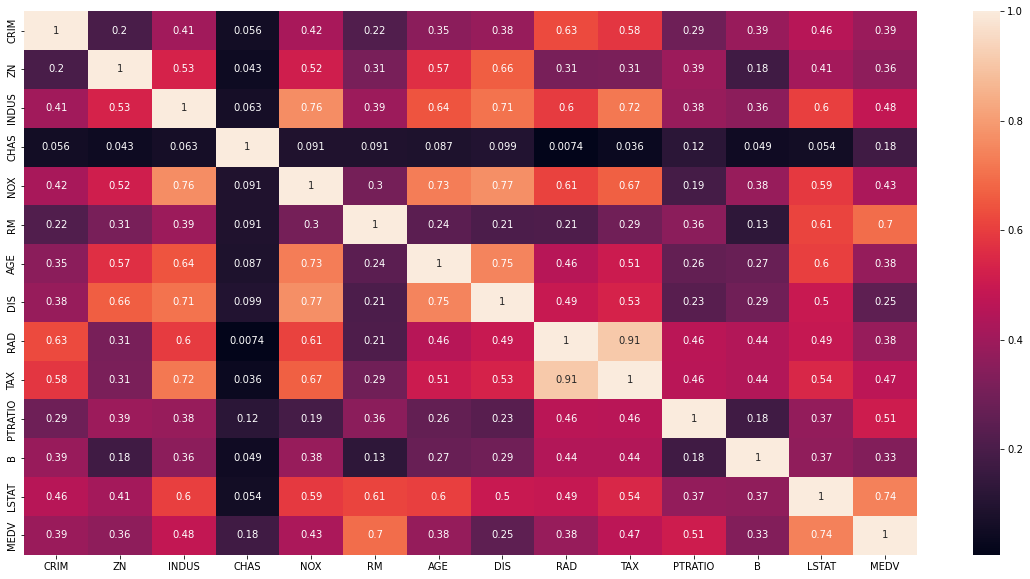

In [51]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [52]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
x

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,0.067815,0.314815,0.577505,0.208015,0.287234,0.089680
1,0.242302,0.172840,0.547998,0.104962,0.553191,0.204470
2,0.242302,0.172840,0.694386,0.104962,0.553191,0.063466
3,0.063050,0.150206,0.658555,0.066794,0.648936,0.033389
4,0.063050,0.150206,0.687105,0.066794,0.648936,0.099338
...,...,...,...,...,...,...
501,0.420455,0.386831,0.580954,0.164122,0.893617,0.219095
502,0.420455,0.386831,0.490324,0.164122,0.893617,0.202815
503,0.420455,0.386831,0.654340,0.164122,0.893617,0.107892
504,0.420455,0.386831,0.619467,0.164122,0.893617,0.131071


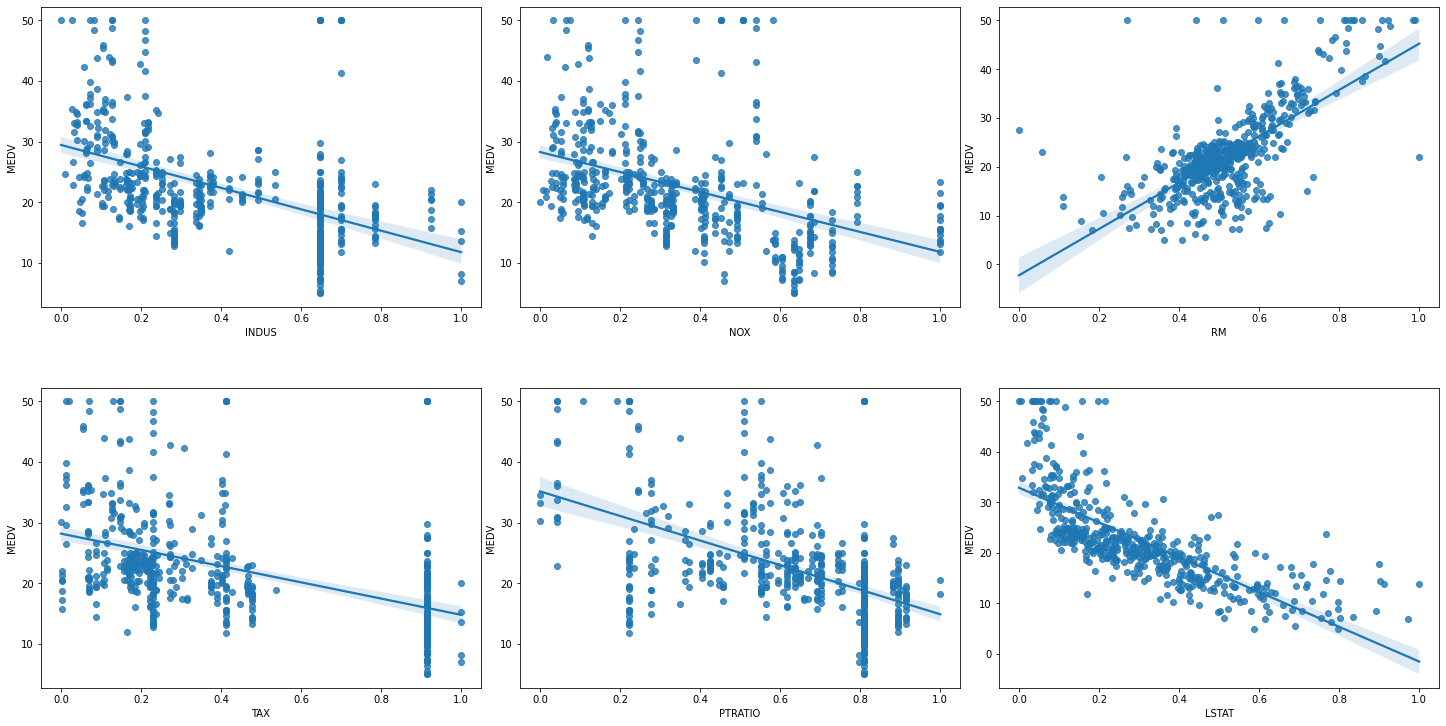

In [53]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [34]:
# Spliting target variable and independent variables
X = x
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123456)

In [37]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()